In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import glob
path = 'Renewable Energy Data/Andhra Pradesh'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,7])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

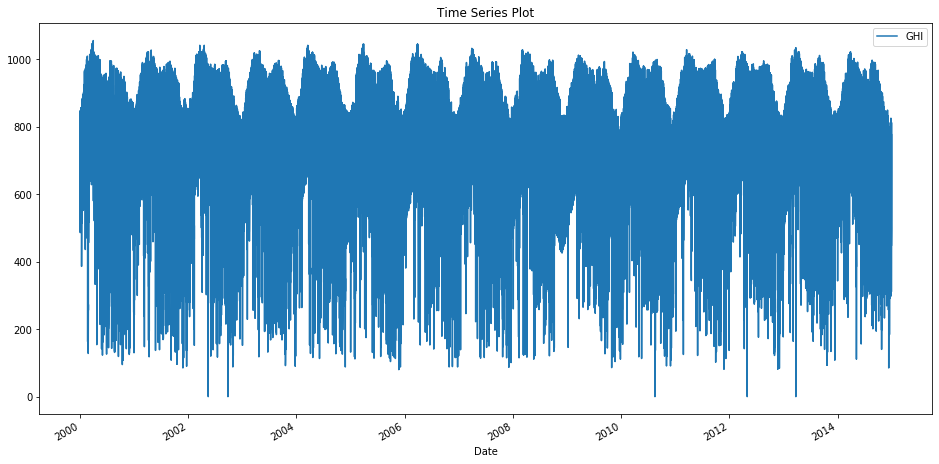

In [11]:
import datetime as dt

df_all = frame[['Date','GHI']]
single = df_all['Date']

df_all.set_index('Date',inplace=True)
df_all = df_all.between_time('09:00','15:00')
df_all.plot(figsize=[16,8],title='Time Series Plot')

In [15]:
df_all

,GHI
Date,
2000-01-01 09:00:00,547
2000-01-01 10:00:00,714
2000-01-01 11:00:00,818
2000-01-01 12:00:00,797
2000-01-01 13:00:00,790
...,...
2014-12-31 11:00:00,783
2014-12-31 12:00:00,812
2014-12-31 13:00:00,766


In [20]:
#     result = adfuller(df_all['GHI'])
#     print('ADF Statistic: %f' % result[0])
#     print('p-value: %f' % result[1])
#     print('Critical Values:')
#     for key, value in result[4].items():
#         print('\t%s: %.3f' % (key, value))
result = adfuller(df_all['GHI'], autolag='AIC')
print('Test statistic: ' , result[0])
print('Critical Values:' ,result[4])

Test statistic:  -13.548691775664546
Critical Values: {'1%': -3.430520884208899, '5%': -2.8616155268006875, '10%': -2.566810200506912}


Null Hypothesis: Time Series Data is non-stationary
Alternative Hypothesis: Time Series Data is Stationary
As the test Statistic Value is significantly less than 1% Critical Value we reject the Null Hypothesis and Conclude that our Time Series Data is Stationary.
This only implies that the data has no trend.

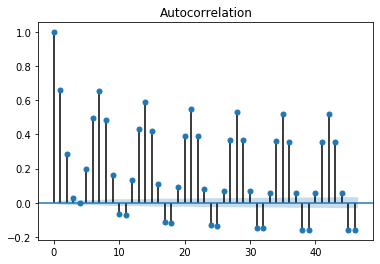

In [22]:
plot_acf(df_all['GHI'])
plt.show()

As we see periodicity in the ACF plot, we conclude that our data is seasonal and non-stationary.


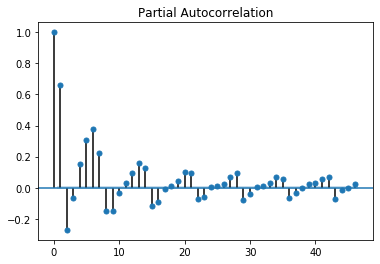

In [24]:
plot_pacf(df_all['GHI'])
plt.show()